<a href="https://colab.research.google.com/github/Palak-Malhotra/Asteroids/blob/main/NASA%20-%20Nearest%20Earth%20Objects/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# Load dataset
near_objects = pd.read_csv("/content/neo.csv")

In [4]:
# Inspect data
near_objects.head(5)

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
# Print summary statistics
near_objects_description = near_objects.describe()
print(near_objects_description)

print('\n')

# Print DataFrame information
near_objects_info = near_objects.info()
print(near_objects_info)

                 id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346433   
25%    3.448110e+06          0.019256          0.043057       28619.020645   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604633   
max    5.427591e+07         37.892650         84.730541      236990.128088   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.70000

In [6]:
# Print the values and their frequencies
print(near_objects[["orbiting_body","sentry_object"]].value_counts())

orbiting_body  sentry_object
Earth          False            90836
dtype: int64


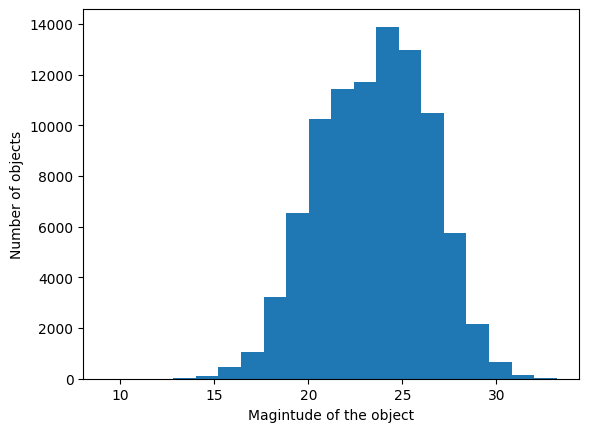

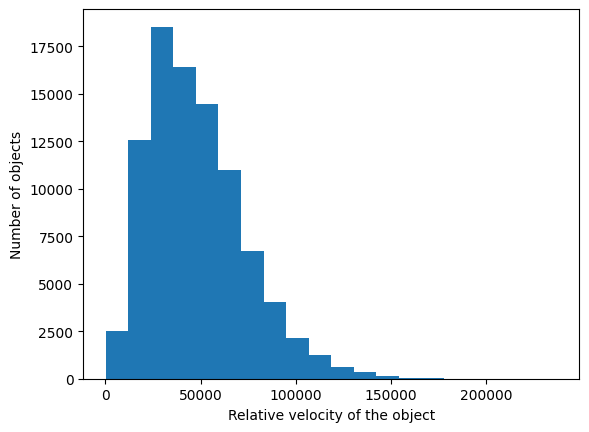

In [7]:
# import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot histrogram of size of the object
plt.hist(near_objects["absolute_magnitude"], bins = 20)

# Label the axis
plt.xlabel("Magintude of the object")
plt.ylabel("Number of objects")

# Show histogram
plt.show()

# Plot histogram of the velocity of the object
plt.hist(near_objects["relative_velocity"], bins = 20)

plt.xlabel("Relative velocity of the object")
plt.ylabel("Number of objects")
plt.show()

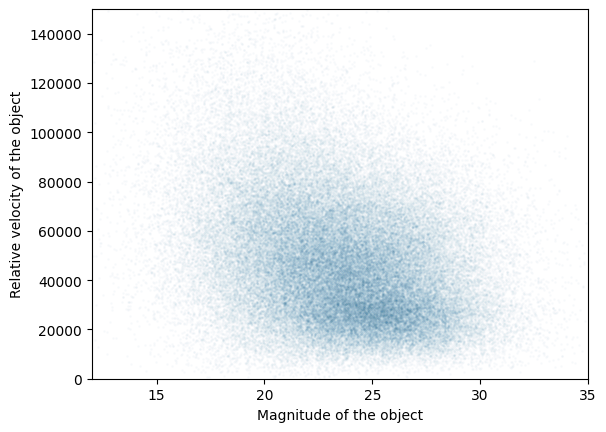

In [8]:
#add random noise to x and y
velocity_jitter = near_objects["relative_velocity"]+np.random.normal(0,2,size=len(near_objects))
magnitude_jitter = near_objects["absolute_magnitude"]+np.random.normal(0,2,size=len(near_objects))
#Define the range of the axis
plt.axis([12,35,0,150000])
# Plot a scatter plot of velocity vs size of the object
plt.plot(magnitude_jitter,velocity_jitter,"o",markersize=1,alpha=0.02)

# label the axis
plt.xlabel("Magnitude of the object")
plt.ylabel("Relative velocity of the object")

# show plot
plt.show()

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.7.2-py3-none-any.whl size=12205 sha256=d49cbc0d7ade3f50ac1b66bc393c5638f65c212937a23cbb4781ba0d4bc0b577
  Stored in directory: /root/.cache/pip/wheels/e9/57/8a/15b864f4d5dc20cef626e3a015fec88b19df385ef30a8364cc
Successfully built empiricaldist


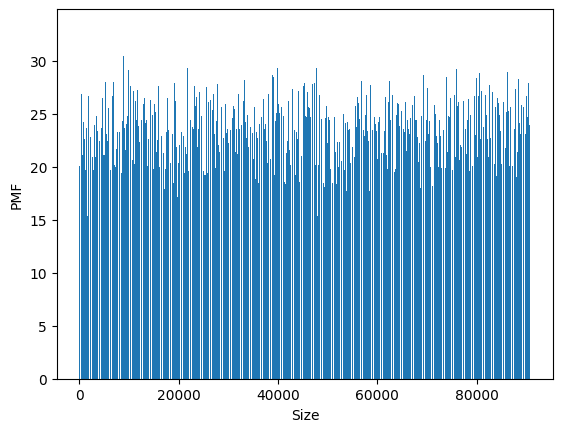

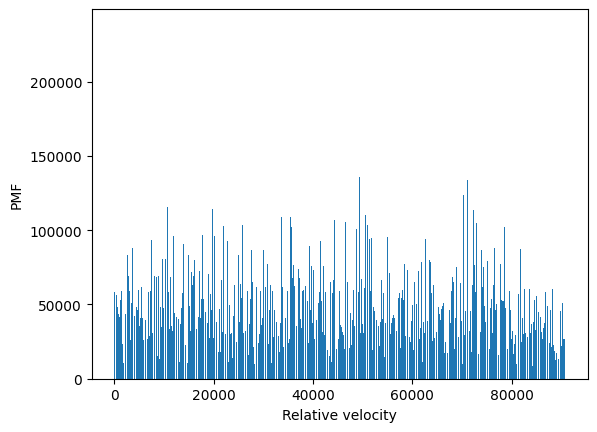

In [9]:
# Install the empiricaldist package for pmf
!pip install empiricaldist

# Load PMF from package
from empiricaldist import Pmf

# find pmf of size of the objects
pmf_size = Pmf(near_objects["absolute_magnitude"])

# Plot a PMF of size
pmf_size.bar(label="absolute_magnitude")

# Label the axes
plt.xlabel("Size")
plt.ylabel("PMF")
plt.show()

# find pmf of velocity of the objects
pmf_velocity = Pmf(near_objects["relative_velocity"])

# Plot a PMF of velocity
pmf_velocity.bar(label="relative_velocity")

# Label the axes
plt.xlabel("Relative velocity")
plt.ylabel("PMF")
plt.show()

In [10]:
# Droping three columns.
earth_objects = near_objects.drop(["name","orbiting_body","sentry_object","id"],axis = 1)

# Print head of new data frame
earth_objects.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,True


In [11]:
# Import numpy
import numpy as np

# Replcace hazardous column with 1 and 0
earth_objects["hazardous"] = np.where(earth_objects["hazardous"]==True,1,0)

# Show the data frame
earth_objects.head(5)

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,1.198271,2.679415,13569.249224,5.483974e+07,16.73,0
1,0.265800,0.594347,73588.726663,6.143813e+07,20.00,1
2,0.722030,1.614507,114258.692129,4.979872e+07,17.83,0
3,0.096506,0.215794,24764.303138,2.543497e+07,22.20,0
4,0.255009,0.570217,42737.733765,4.627557e+07,20.09,1


In [12]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
near_earth_train, near_earth_test = train_test_split(earth_objects, test_size=0.33, random_state=42)

# Segregate features and labels into separate variables
X_train, y_train = near_earth_train.iloc[:,:-1].values, near_earth_train.iloc[:,-1].values
X_test, y_test = near_earth_test.iloc[:,:-1].values, near_earth_test.iloc[:,-1].values

#Import LogistcRegression, StandardScaler and pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import KFold, cross_val_score

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", lr.score(X_test,y_test))

# Print the confusion matrix of the lr model
print(confusion_matrix(y_test,y_pred))

Accuracy of logistic regression classifier:  0.90162129703763
[[27027     0]
 [ 2949     0]]


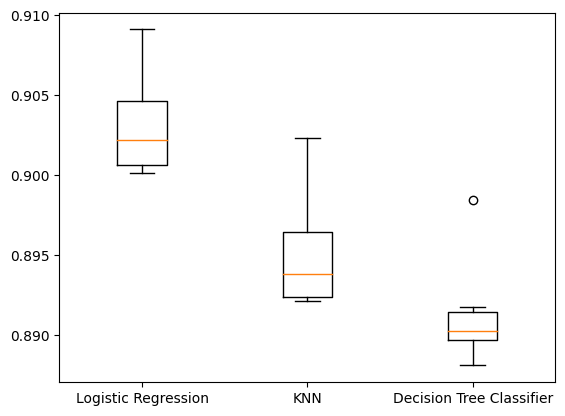

In [13]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():

  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)

  # Perform cross-validation
  cv_results = cross_val_score(model, X_train, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

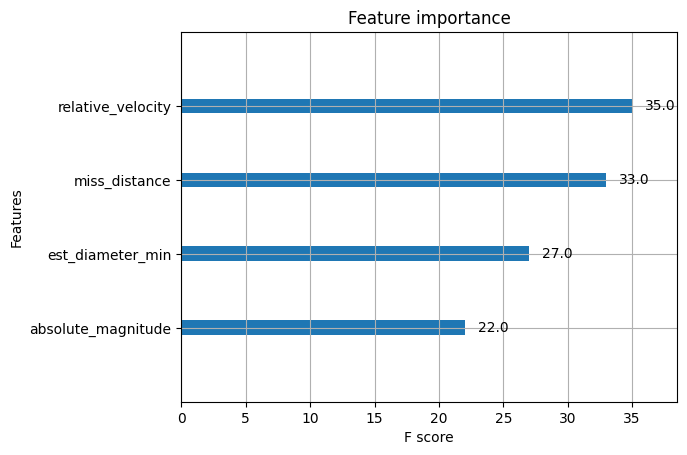

In [14]:
#Import xgboost as xgb
import xgboost as xgb
# Create the DMatrix:
earth_dmatrix = xgb.DMatrix(data=earth_objects.iloc[:,:-1], label=earth_objects.iloc[:,-1])

# Create the parameter dictionary: params
params = {"objective":'binary:logistic', "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=earth_dmatrix, num_boost_round=10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()